In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [3]:
df_past = pd.read_excel("C:/Users/DELL/OneDrive/Documents/Worksheet in EXL_EQ_Case_Term_Deposit_Lead_Prediction_Final_Draft_PD_V01.xlsx")

In [4]:
df = df_past

In [5]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23403.000000,23603.000000,23880.000000,23880.000000,23784.000000,23880.000000,23880.000000
mean,40.394821,1363.966106,15.796315,854.879648,2.775353,0.583836,0.106198
std,10.753045,3019.583085,8.321136,74.537616,3.148117,2.624465,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
25%,32.000000,71.000000,8.000000,809.000000,1.000000,0.000000,0.000000
50%,38.000000,443.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1410.500000,21.000000,897.000000,3.000000,0.000000,0.000000
max,93.000000,98419.000000,31.000000,1019.000000,63.000000,275.000000,1.000000


In [4]:
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [5]:
df.shape

(23880, 17)

#### Checking for Class Imbalance

In [6]:
df["term_deposit_subscribed"].value_counts()

0    21344
1     2536
Name: term_deposit_subscribed, dtype: int64

In [8]:
for i in categorical_col :
    print(i, end= "\n")
    print( )
    print(df[i].value_counts())
    print()

customer_id

id_32289    1
id_42421    1
id_13447    1
id_43305    1
id_3525     1
           ..
id_7426     1
id_20929    1
id_1997     1
id_19870    1
id_1723     1
Name: customer_id, Length: 23880, dtype: int64

job_type

blue-collar      5167
management       5006
technician       3978
admin.           2717
services         2224
retired          1176
self-employed     845
entrepreneur      773
unemployed        675
housemaid         663
student           502
unknown           154
Name: job_type, dtype: int64

marital

married     14271
single       6707
divorced     2795
Name: marital, dtype: int64

education

secondary    12330
tertiary      6993
primary       3571
unknown        986
Name: education, dtype: int64

default

no     23452
yes      428
Name: default, dtype: int64

housing_loan

yes    13369
no     10511
Name: housing_loan, dtype: int64

personal_loan

no     20001
yes     3766
Name: personal_loan, dtype: int64

communication_type

cellular     15486
unknown       6892

housing_loan


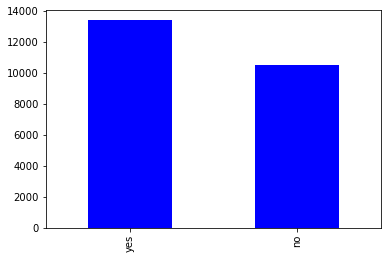

no
yes

personal_loan


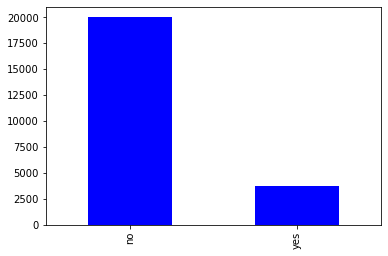

yes
no
nan

communication_type


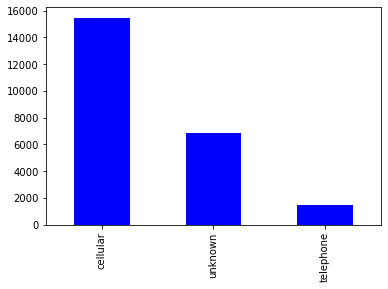

cellular
unknown
telephone

month


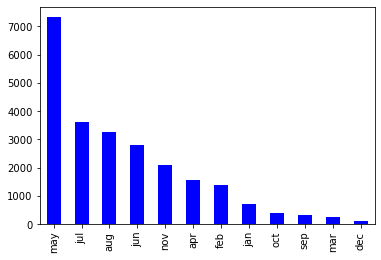

nov
may
aug
apr
feb
jun
jul
jan
oct
sep
mar
dec

job_type


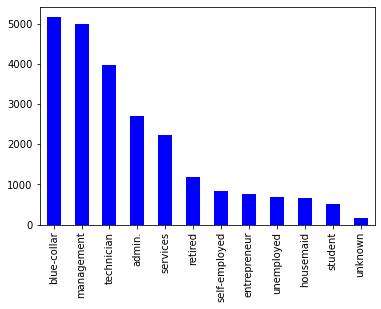

blue-collar
management
technician
services
retired
entrepreneur
admin.
student
housemaid
self-employed
unknown
unemployed

marital


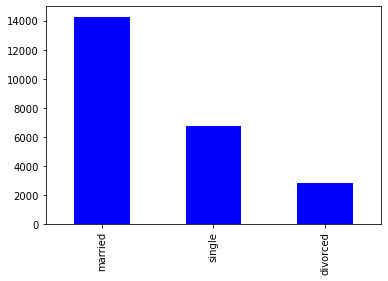

married
single
divorced
nan

education


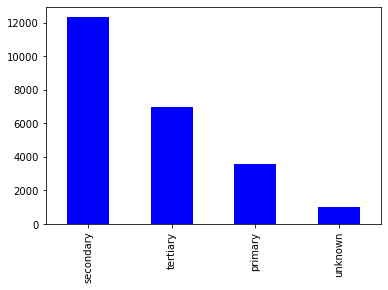

secondary
primary
tertiary
unknown

default


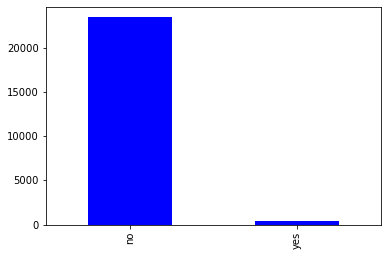

no
yes

prev_campaign_outcome


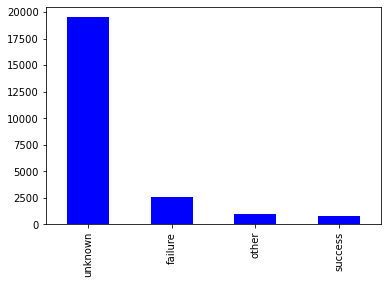

other
unknown
failure
success



In [18]:
categorical_col = ['housing_loan','personal_loan','communication_type','month','job_type','marital','education','default','prev_campaign_outcome']
for i in categorical_col:
    print(i)
    df[i].value_counts().plot(kind='bar', color = 'blue')
    plt.show()
    for j in df[i].unique():
        print(j)
    
    print( ) 

In [7]:
(2536/(2536+21344))*100

10.619765494137354

#### term_deposit_subscribed is just 10% , hence imbalanced dataset, so we will have to fix the class imbalance

# Studying Categorical and Numerical features

In [23]:
categorical_features=df_past.select_dtypes(include="object").columns
categorical_features

Index(['customer_id', 'job_type', 'marital', 'education', 'default',
       'housing_loan', 'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')

In [24]:
numerical_features=df_past.select_dtypes(exclude="object").columns
numerical_features

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'term_deposit_subscribed'],
      dtype='object')

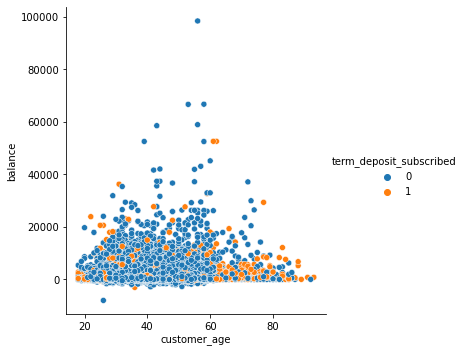

In [25]:
g = sns.relplot(data=df_past, x="customer_age", y="balance", hue="term_deposit_subscribed")

25 to 60 - not applying for TD

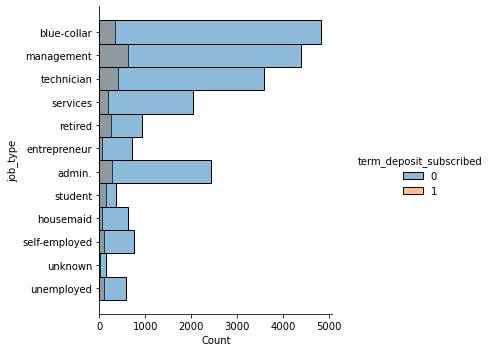

In [30]:
sns.displot(data=df_past, y="job_type", hue="term_deposit_subscribed", color= "pastel")

In the given data, most of the data is sampled from blue collar and management. percent of term depoist is subscribed by management


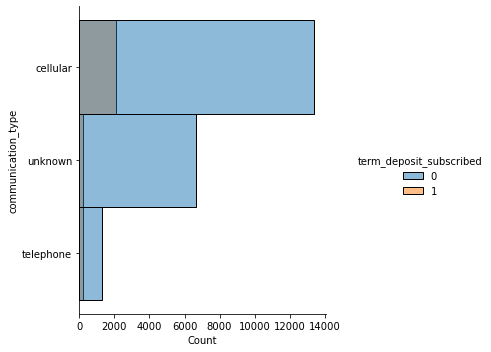

In [31]:
sns.displot(data=df_past, y="communication_type", hue="term_deposit_subscribed", color= "pastel")

Most of the customer was contacted through cellular,% of subscribing is high in cellular

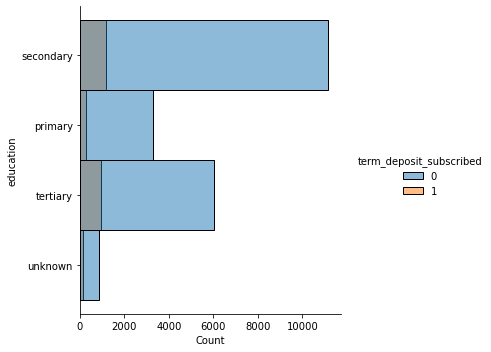

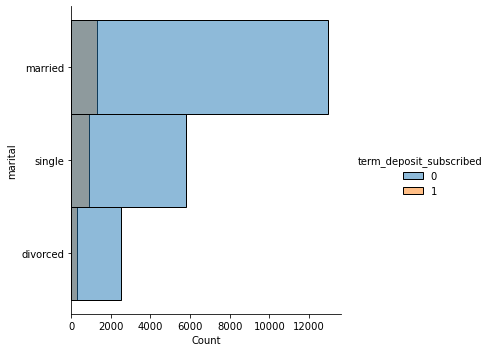

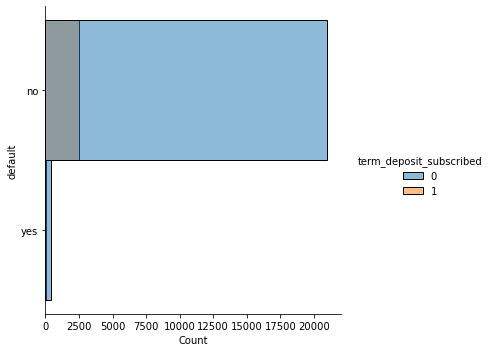

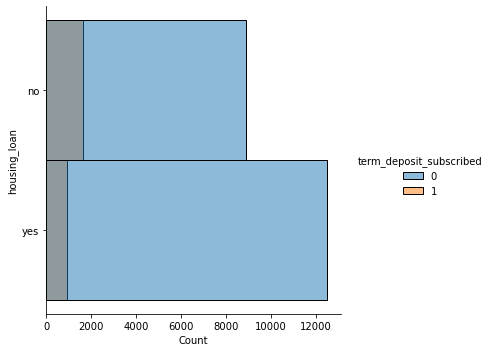

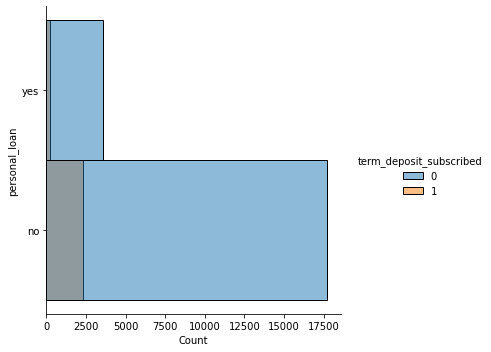

In [37]:
sns.displot(data=df_past, y="education", hue="term_deposit_subscribed", color= "pastel")
sns.displot(data=df_past, y="marital", hue="term_deposit_subscribed", color= "pastel")
sns.displot(data=df_past, y="default", hue="term_deposit_subscribed", color= "pastel")
sns.displot(data=df_past, y="housing_loan", hue="term_deposit_subscribed", color= "pastel")
sns.displot(data=df_past, y="personal_loan", hue="term_deposit_subscribed", color= "pastel")

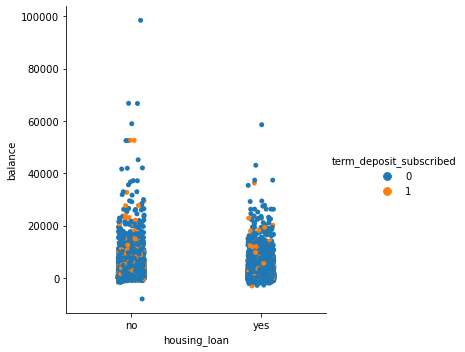

In [39]:
sns.catplot(x="housing_loan", y="balance", data=df_past,hue="term_deposit_subscribed")

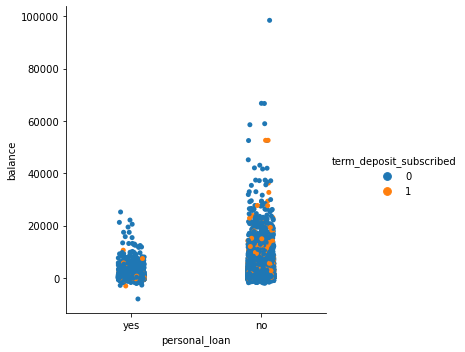

In [40]:
sns.catplot(x="personal_loan", y="balance", data=df_past,hue="term_deposit_subscribed")

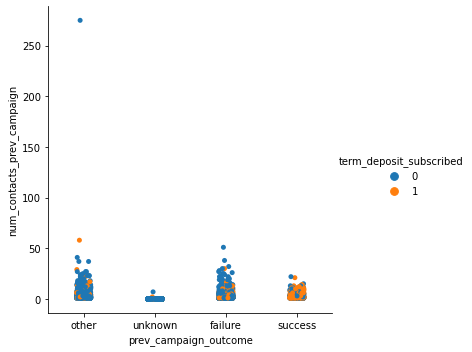

In [46]:
sns.catplot(x="prev_campaign_outcome", y="num_contacts_prev_campaign", data=df_past,hue="term_deposit_subscribed")

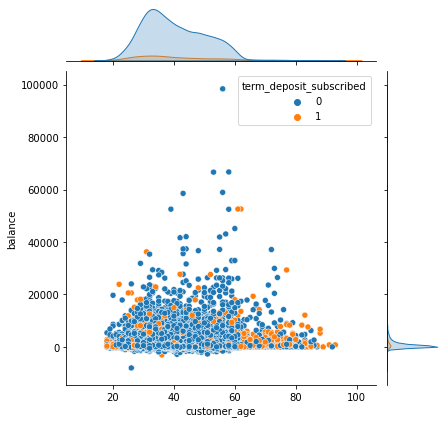

In [41]:
sns.jointplot(data=df_past, x="customer_age", y="balance", hue="term_deposit_subscribed")

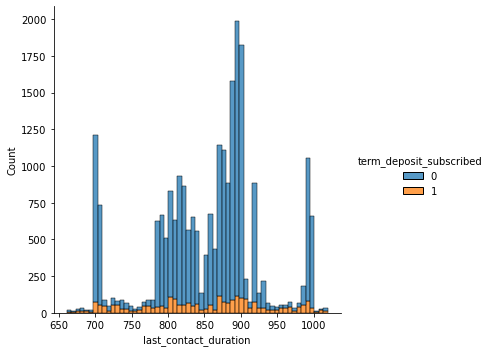

In [66]:
sns.displot(data=df_past, x="last_contact_duration", hue="term_deposit_subscribed", multiple="stack", kind="hist")

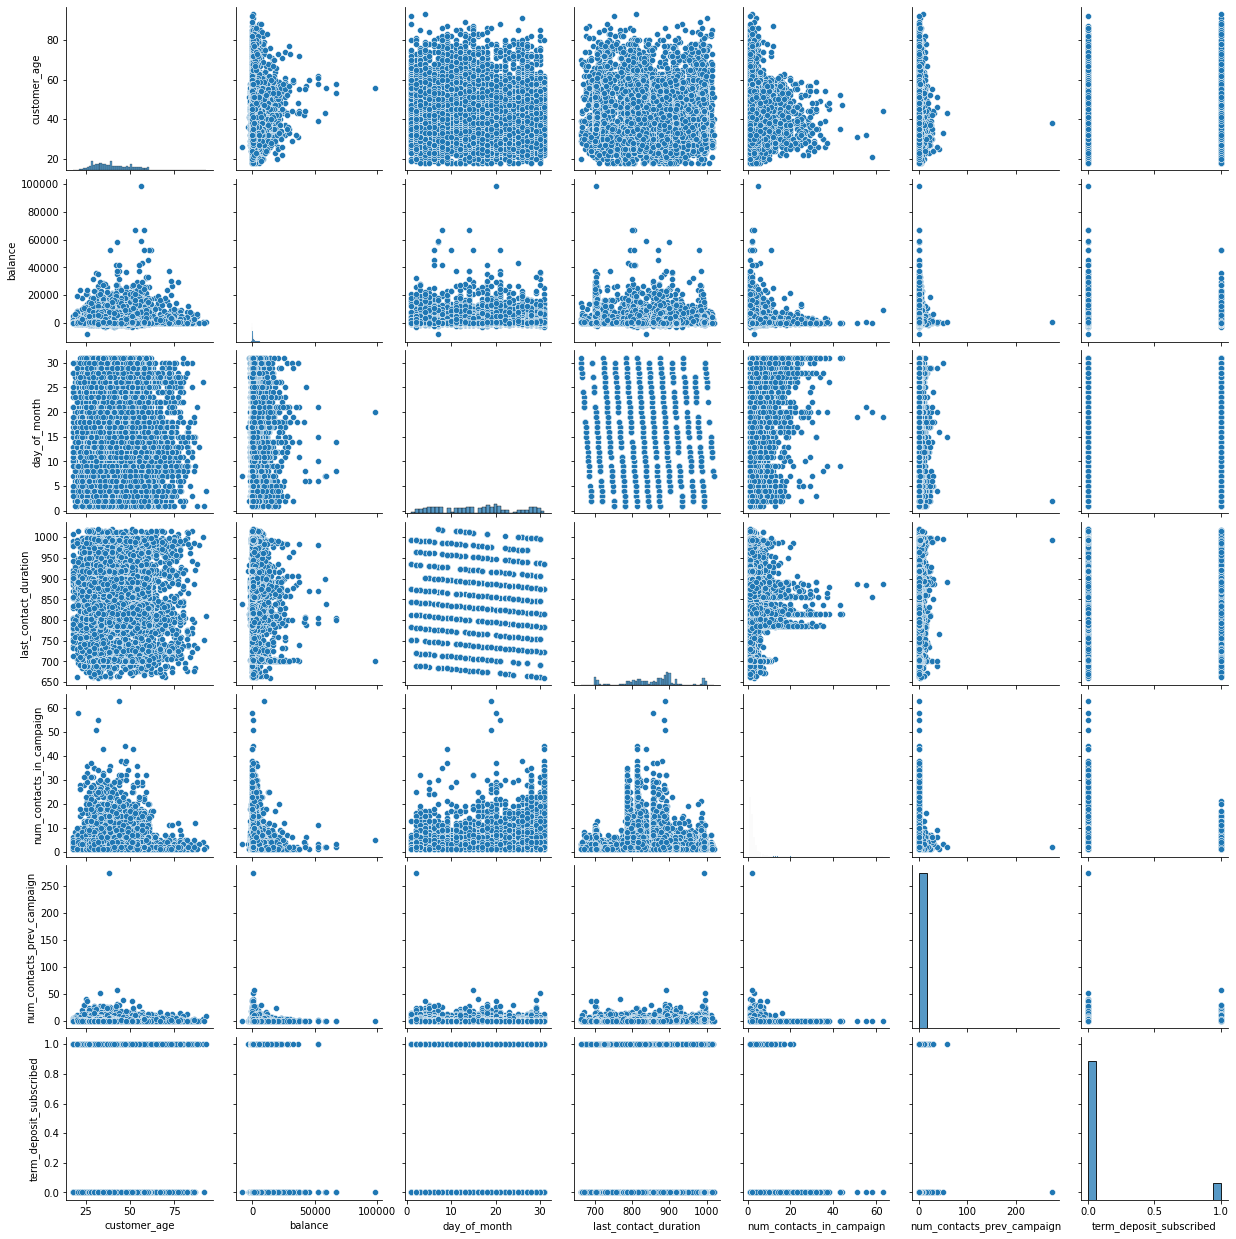

In [43]:
sns.pairplot(df_past)

<AxesSubplot:xlabel='customer_age'>

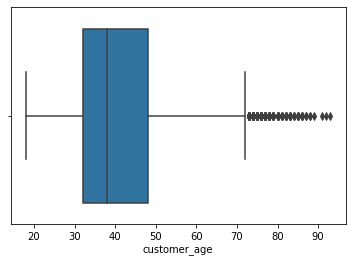

In [54]:
sns.boxplot(x= "customer_age", data=df_past)

<AxesSubplot:xlabel='balance'>

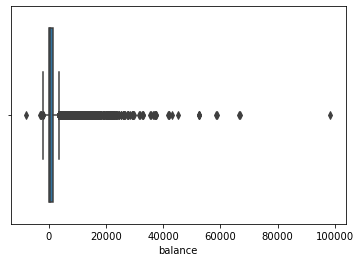

In [55]:
sns.boxplot(x= "balance", data=df_past)

<AxesSubplot:xlabel='num_contacts_in_campaign'>

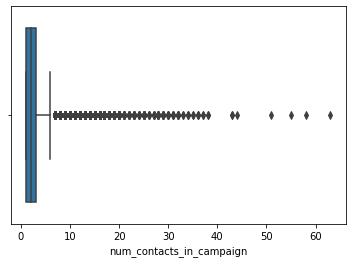

In [56]:
sns.boxplot(x= "num_contacts_in_campaign", data=df_past)

In [5]:
df_past.corr()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
customer_age,1.000000,0.106850,-0.014534,-0.091451,0.008338,-0.004242,0.032112
balance,0.106850,1.000000,0.004370,-0.096978,-0.018266,0.011218,0.052946
day_of_month,-0.014534,0.004370,1.000000,-0.208932,0.164829,-0.044913,-0.024477
last_contact_duration,-0.091451,-0.096978,-0.208932,1.000000,-0.068436,0.037976,-0.019215
num_contacts_in_campaign,0.008338,-0.018266,0.164829,-0.068436,1.000000,-0.029736,-0.071203
num_contacts_prev_campaign,-0.004242,0.011218,-0.044913,0.037976,-0.029736,1.000000,0.084544
term_deposit_subscribed,0.032112,0.052946,-0.024477,-0.019215,-0.071203,0.084544,1.000000


<AxesSubplot:>

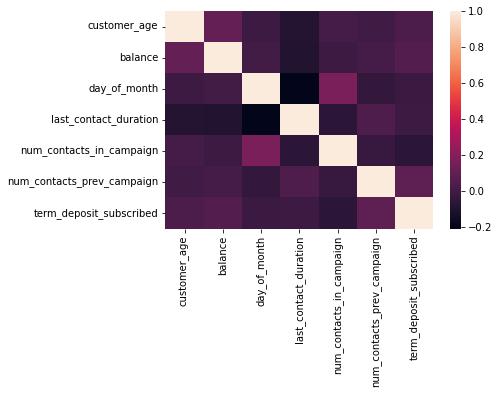

In [6]:
sns.heatmap(df_past.corr())

In [7]:
df_past.describe(percentiles = (0.1,0.2,0.4,0.75, 0.9, 0.95, 0.98, 0.99))

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23403.000000,23603.000000,23880.000000,23880.000000,23784.000000,23880.000000,23880.000000
mean,40.394821,1363.966106,15.796315,854.879648,2.775353,0.583836,0.106198
std,10.753045,3019.583085,8.321136,74.537616,3.148117,2.624465,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
10%,28.000000,-3.000000,5.000000,733.000000,1.000000,0.000000,0.000000
20%,31.000000,22.000000,7.000000,801.000000,1.000000,0.000000,0.000000
40%,36.000000,269.000000,13.000000,838.000000,2.000000,0.000000,0.000000
50%,38.000000,443.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1410.500000,21.000000,897.000000,3.000000,0.000000,0.000000
90%,55.000000,3620.800000,28.000000,935.000000,5.000000,2.000000,1.000000


#### Checking for Missing values

In [8]:
df_past.isnull().sum()

customer_id                     0
customer_age                  477
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

#### percentage(%) of missing values

In [9]:
(df_past.isnull().sum()/len(df_past.index))*100

customer_id                   0.000000
customer_age                  1.997487
job_type                      0.000000
marital                       0.448074
education                     0.000000
default                       0.000000
balance                       1.159966
housing_loan                  0.000000
personal_loan                 0.473199
communication_type            0.000000
day_of_month                  0.000000
month                         0.000000
last_contact_duration         0.000000
num_contacts_in_campaign      0.402010
num_contacts_prev_campaign    0.000000
prev_campaign_outcome         0.000000
term_deposit_subscribed       0.000000
dtype: float64

In [21]:
print("Percentage of data missing in respective columns\n")
print(((df.isna().sum())/23880)*100), df.isna().sum()

Percentage of data missing in respective columns

customer_id                   0.000000
customer_age                  1.997487
job_type                      0.000000
marital                       0.448074
education                     0.000000
default                       0.000000
balance                       1.159966
housing_loan                  0.000000
personal_loan                 0.473199
communication_type            0.000000
day_of_month                  0.000000
month                         0.000000
last_contact_duration         0.000000
num_contacts_in_campaign      0.402010
num_contacts_prev_campaign    0.000000
prev_campaign_outcome         0.000000
term_deposit_subscribed       0.000000
dtype: float64


(None,
 customer_id                     0
 customer_age                  477
 job_type                        0
 marital                       107
 education                       0
 default                         0
 balance                       277
 housing_loan                    0
 personal_loan                 113
 communication_type              0
 day_of_month                    0
 month                           0
 last_contact_duration           0
 num_contacts_in_campaign       96
 num_contacts_prev_campaign      0
 prev_campaign_outcome           0
 term_deposit_subscribed         0
 dtype: int64)

#### Features having missing values in past data have missing values in prediction data aswell

### Handling Missing Values

##### First considering past data

In [6]:
df_past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23403 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23773 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23603 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23767 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    237

In [7]:
df_past.select_dtypes(include="object").isnull().sum()

customer_id                0
job_type                   0
marital                  107
education                  0
default                    0
housing_loan               0
personal_loan            113
communication_type         0
month                      0
prev_campaign_outcome      0
dtype: int64

#### So in the categorical varibles, only "marital" and "personal_loan" have missing values

In [9]:
df_past.marital.value_counts()

married     14271
single       6707
divorced     2795
Name: marital, dtype: int64

#### Imputing the missing values in "marital" by mode of the feature "marital" i.e "married"

In [10]:
df_past.loc[pd.isnull(df_past["marital"]),"marital"]="married"

In [11]:
df_past.marital.isnull().sum()

0

In [12]:
df_past.marital.value_counts()

married     14378
single       6707
divorced     2795
Name: marital, dtype: int64

##### Hence missing values in feature "marital" sorted using mode value of "marital" i.e married

In [13]:
df_past.personal_loan.value_counts()

no     20001
yes     3766
Name: personal_loan, dtype: int64

#### since maximum number of people do not have a personal loan, so imputing the missing values in feature "personal_loan" with "no"

In [14]:
df_past.loc[pd.isnull(df_past["personal_loan"]),"personal_loan"]="no"

In [15]:
df_past.personal_loan.isnull().sum()

0

In [16]:
df_past.personal_loan.value_counts()

no     20114
yes     3766
Name: personal_loan, dtype: int64

##### Hence missing values in feature "personal_loan" sorted

### Now considering the numerical variables for handling missing values

In [17]:
df_past.select_dtypes(exclude="object").isnull().sum()

customer_age                  477
balance                       277
day_of_month                    0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
term_deposit_subscribed         0
dtype: int64

#### Considering customer_age first

In [18]:
df_past.customer_age.value_counts()

34.0    1019
33.0    1010
32.0     999
31.0     972
35.0     944
        ... 
87.0       2
91.0       1
89.0       1
93.0       1
92.0       1
Name: customer_age, Length: 75, dtype: int64

In [19]:
df_past.customer_age.describe()

count    23403.000000
mean        40.394821
std         10.753045
min         18.000000
25%         32.000000
50%         38.000000
75%         48.000000
max         93.000000
Name: customer_age, dtype: float64

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


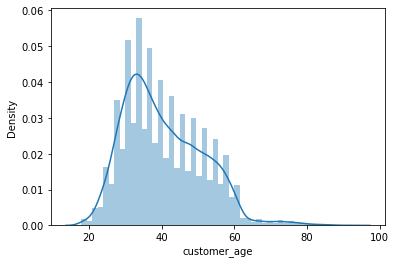

<Figure size 432x288 with 0 Axes>

In [20]:
sns.distplot(df['customer_age'])
fig = plt.figure()

In [21]:
# counting people with age=34 i.e mode
df_past.loc[df_past["customer_age"]==34.0].shape

(1019, 17)

In [22]:
# counting people with age=38 i.e median
df_past.loc[df_past["customer_age"]==38.0].shape

(809, 17)

#### Since the max age "93" is an outlier, so we may either impute median value or the mode value, since the median value is 38 and mode value is 34 and the value_counts of "34" are quite more than "38" so we will impute the modal value i.e 34

In [23]:
print(df_past.customer_age.mode())

0    34.0
dtype: float64


In [24]:
df_past.loc[pd.isnull(df_past.customer_age),"customer_age"]=38.0

In [25]:
df_past.customer_age.isnull().sum()

0

In [26]:
df_past.customer_age.value_counts()

38.0    1286
34.0    1019
33.0    1010
32.0     999
31.0     972
        ... 
87.0       2
91.0       1
89.0       1
93.0       1
92.0       1
Name: customer_age, Length: 75, dtype: int64

In [27]:
df_past.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23880.000000,23603.000000,23880.000000,23880.000000,23784.000000,23880.000000,23880.000000
mean,40.346985,1363.966106,15.796315,854.879648,2.775353,0.583836,0.106198
std,10.650376,3019.583085,8.321136,74.537616,3.148117,2.624465,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
25%,32.000000,71.000000,8.000000,809.000000,1.000000,0.000000,0.000000
50%,38.000000,443.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1410.500000,21.000000,897.000000,3.000000,0.000000,0.000000
max,93.000000,98419.000000,31.000000,1019.000000,63.000000,275.000000,1.000000


#### Now considering feature "num_contacts_in_campaign"

In [28]:
df_past.num_contacts_in_campaign.value_counts()

1.0     9211
2.0     6577
3.0     2940
4.0     1827
5.0      936
6.0      654
7.0      394
8.0      282
9.0      175
10.0     147
11.0     107
13.0      80
12.0      79
15.0      49
14.0      44
16.0      39
17.0      37
18.0      29
20.0      27
19.0      23
25.0      15
21.0      13
23.0      12
28.0      11
22.0      10
29.0       9
24.0       7
32.0       7
27.0       6
30.0       6
26.0       5
31.0       5
36.0       3
34.0       3
37.0       2
33.0       2
38.0       2
35.0       2
43.0       2
51.0       1
55.0       1
58.0       1
63.0       1
44.0       1
Name: num_contacts_in_campaign, dtype: int64

In [29]:
df_past.num_contacts_in_campaign.describe()

count    23784.000000
mean         2.775353
std          3.148117
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_contacts_in_campaign, dtype: float64

#### Since the distribution is not narrow and there are a lot of people who have been contacted more than 1 to 3 times, so lets impute the median value 

In [30]:
df_past.num_contacts_in_campaign=df_past.num_contacts_in_campaign.fillna(df_past.num_contacts_in_campaign.median())

In [31]:
df_past.num_contacts_in_campaign.isnull().sum()

0

In [32]:
df_past.num_contacts_in_campaign.value_counts()

1.0     9211
2.0     6673
3.0     2940
4.0     1827
5.0      936
6.0      654
7.0      394
8.0      282
9.0      175
10.0     147
11.0     107
13.0      80
12.0      79
15.0      49
14.0      44
16.0      39
17.0      37
18.0      29
20.0      27
19.0      23
25.0      15
21.0      13
23.0      12
28.0      11
22.0      10
29.0       9
24.0       7
32.0       7
27.0       6
30.0       6
26.0       5
31.0       5
36.0       3
34.0       3
37.0       2
33.0       2
38.0       2
35.0       2
43.0       2
51.0       1
55.0       1
58.0       1
63.0       1
44.0       1
Name: num_contacts_in_campaign, dtype: int64

In [33]:
df_past.balance.describe()

count    23603.000000
mean      1363.966106
std       3019.583085
min      -8020.000000
25%         71.000000
50%        443.000000
75%       1410.500000
max      98419.000000
Name: balance, dtype: float64

In [34]:
df_past.balance.isnull().sum()

277

#### Since the variable balance has outliers ,so wont be great to replace the missing values with mean. hence proceeding with median

In [35]:
df_past.balance=df_past.balance.fillna(df_past.balance.median())

In [36]:
df_past.isnull().sum()

customer_id                   0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

# OUTLIERS treatment 

In [37]:
numerical_features=df_past.select_dtypes(exclude="object").columns
numerical_features

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'term_deposit_subscribed'],
      dtype='object')

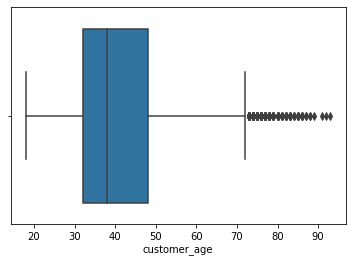

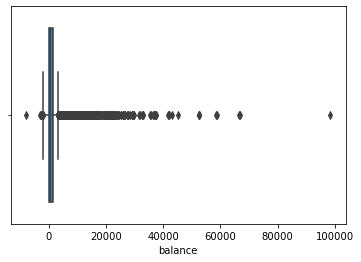

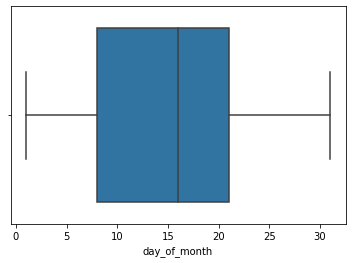

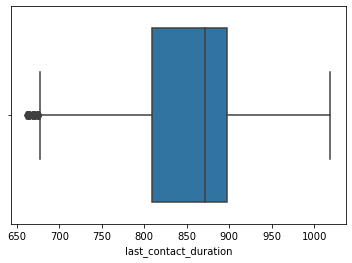

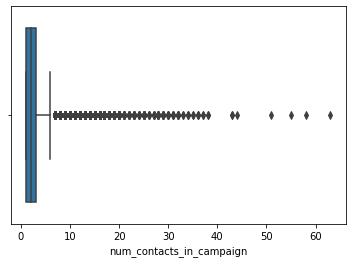

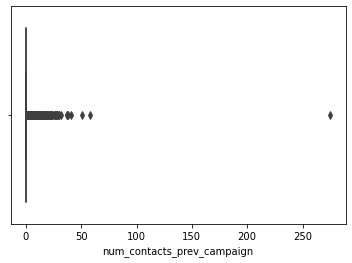

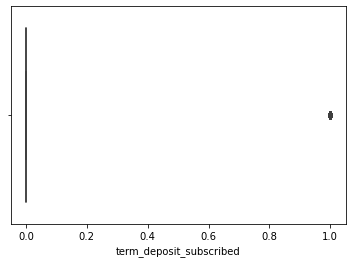

In [38]:
for i in numerical_features:
    sns.boxplot(x= i, data=df_past)
    plt.show()

In [39]:
# counting the number of outliers below lower whisker and above upper whisker by using (Q1 - 1.5*IQR, Q3 + 1.5*IQR) standard approach
for i in numerical_features:
    count = 0
    q1 = np.percentile(df_past[i],25)
    q3 = np.percentile(df_past[i],75)
    up_whisk = q3 + (1.5*(q3-q1))
    lo_whisk = q1 - (1.5*(q3-q1))
    print("up_whisk",up_whisk,"   "'lo_whisk',lo_whisk)
    for j in df_past[i]:
        if (j < q1 or j > q3):
            count = count + 1
    print(i,"               ",count) 
    print()

up_whisk 72.0    lo_whisk 8.0
customer_age                 10789

up_whisk 3365.0    lo_whisk -1899.0
balance                 11936

up_whisk 40.5    lo_whisk -11.5
day_of_month                 11038

up_whisk 1029.0    lo_whisk 677.0
last_contact_duration                 11681

up_whisk 6.0    lo_whisk -2.0
num_contacts_in_campaign                 5056

up_whisk 0.0    lo_whisk 0.0
num_contacts_prev_campaign                 4369

up_whisk 0.0    lo_whisk 0.0
term_deposit_subscribed                 2536



In [40]:
df_past2 = df_past

In [41]:
# counting the number of outliers by calculating Z-scores 
import numpy as np
count = 0 
for i in numerical_features:
    thres = 3
    mean = np.mean(df_past2[i])
    std = np.std(df_past2[i])
    print(mean, std)
    for j in df_past2[i]:
        z_score = (j - mean)/std
        if (np.abs(z_score) > thres):
            count = count + 1
    print("Column :  ", i)
    print("Outliers from Z-scores method: ", count)
    print()

40.346984924623115 10.650152527816996
Column :   customer_age
Outliers from Z-scores method:  193

1353.2832077051926 3003.574582074906
Column :   balance
Outliers from Z-scores method:  600

15.796314907872697 8.320962196809598
Column :   day_of_month
Outliers from Z-scores method:  600

854.879648241206 74.53605529476731
Column :   last_contact_duration
Outliers from Z-scores method:  600

2.7722361809045224 3.1420993991815074
Column :   num_contacts_in_campaign
Outliers from Z-scores method:  1055

0.5838358458961475 2.624409965087015
Column :   num_contacts_prev_campaign
Outliers from Z-scores method:  1288

0.10619765494137354 0.30809042994929414
Column :   term_deposit_subscribed
Outliers from Z-scores method:  1288



In [42]:
df_past.describe(percentiles = (0.05,0.1,0.15,0.2,0.3,0.4,0.75, 0.9, 0.95, 0.98, 0.99,0.999))

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23880.000000,23880.000000,23880.000000,23880.000000,23880.000000,23880.000000,23880.000000
mean,40.346985,1353.283208,15.796315,854.879648,2.772236,0.583836,0.106198
std,10.650376,3003.637473,8.321136,74.537616,3.142165,2.624465,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
5%,26.000000,-164.050000,3.000000,703.000000,1.000000,0.000000,0.000000
10%,28.000000,-3.000000,5.000000,733.000000,1.000000,0.000000,0.000000
15%,30.000000,2.000000,6.000000,789.000000,1.000000,0.000000,0.000000
20%,31.000000,23.000000,7.000000,801.000000,1.000000,0.000000,0.000000
30%,33.000000,133.000000,10.000000,820.000000,1.000000,0.000000,0.000000
40%,36.000000,277.000000,13.000000,838.000000,2.000000,0.000000,0.000000


## Quantile based flooring and capping

### 1) customer_age 

In [43]:
fifth_per = np.percentile(df_past['customer_age'], 5)
ninetieighth_percentile = np.percentile(df_past['customer_age'], 98)
fifth_per,ninetieighth_percentile

(26.0, 63.0)

In [44]:
# Computing 5th, 98th percentiles and replacing the outliers with them 
fifth_per = np.percentile(df_past['customer_age'], 5)
ninetieighth_percentile = np.percentile(df_past['customer_age'], 98)
# print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
df_past['customer_age'].loc[df_past['customer_age']<fifth_per] = fifth_per
df_past['customer_age'].loc[df_past['customer_age']>ninetieighth_percentile] = ninetieighth_percentile
print(df_past['customer_age'].max(),df_past['customer_age'].min())

63.0 26.0


C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## 2) balance

In [45]:
# up_whisk 3365.0    lo_whisk -1899.0
# Computing 5th, 95th percentiles and replacing the outliers with them 

In [46]:
fifth_per = np.percentile(df_past['balance'], 5)
ninetieififth_percentile = np.percentile(df_past['balance'], 95)
# print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
df_past['balance'].loc[df_past['balance']<fifth_per] = fifth_per
df_past['balance'].loc[df_past['balance']>ninetieififth_percentile] = ninetieififth_percentile
print(df_past['balance'].max(),df_past['balance'].min())

5748.0 -164.04999999999995


## 3) day of month - leaving it (not treating the outliers)

<AxesSubplot:>

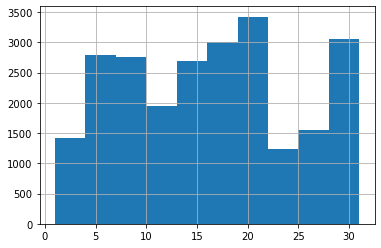

In [47]:
# since the *skewness* is almost 0 hence we treat outliers with median value
df_past['day_of_month'].hist()

## 4) last_contact_duration

In [48]:
# last_contact_duration skewness   -    -0.302493
# since its very less and it is skewed from the left hand side 

In [49]:
df_past['last_contact_duration'] = df_past2['last_contact_duration']

In [50]:
fiftienth_per = np.percentile(df_past['last_contact_duration'], 15)
# print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
df_past['last_contact_duration'].loc[df_past['last_contact_duration']<fiftienth_per] = fiftienth_per
print(df_past['last_contact_duration'].max(),df_past['last_contact_duration'].min())

1019 789


## 5) num_contacts_in_campaign

In [51]:
# num_contacts_in_campaign skewness    -   4.956999
# since the value of skewness can be seen as highly significant so it should be handeled carefully

In [52]:
ninetieififth_percentile = np.percentile(df_past['num_contacts_in_campaign'], 95)
df_past['num_contacts_in_campaign'].loc[df_past['num_contacts_in_campaign']>ninetieififth_percentile] = ninetieififth_percentile
print(df_past['num_contacts_in_campaign'].max(),df_past['num_contacts_in_campaign'].min())

8.0 1.0


## 6) num_contacts_prev_campaign

In [53]:
# num_contacts_prev_campaign skewneess  -  51.18960
# It can be seen that there is very drastically high skewness so it should be handeled with atmost care.

In [54]:
ninetieninth_percentile = np.percentile(df_past['num_contacts_prev_campaign'], 99)
df_past['num_contacts_prev_campaign'].loc[df_past['num_contacts_prev_campaign']>ninetieninth_percentile] = ninetieninth_percentile
print(df_past['num_contacts_prev_campaign'].max(),df_past['num_contacts_prev_campaign'].min())

8 0


In [55]:
df_past['num_contacts_prev_campaign'].skew(axis=0)

3.4739962212694326

# One - Hot Encoding 

In [56]:

one_hot_encoded_data = pd.get_dummies(df_past, columns = ['job_type', 'marital', 'education', 'default',
       'housing_loan', 'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'])
one_hot_encoded_data

,customer_id,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,job_type_admin.,job_type_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,id_32289,34.0,934.0,18,789,2.0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,id_40992,41.0,1352.0,13,893,2.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,id_41178,57.0,495.0,18,796,4.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,id_35102,37.0,650.0,26,880,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,id_34750,29.0,265.0,19,795,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,id_27290,58.0,567.0,2,993,2.0,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0
23876,id_20428,51.0,1072.0,20,855,7.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
23877,id_44679,41.0,242.0,23,883,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
23878,id_4841,48.0,2699.0,11,803,6.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
data.get_feature_names_out().values_counts()

NameError: name 'data' is not defined

In [58]:
data = one_hot_encoded_data

In [59]:
data.set_index(data['customer_id'], inplace = True)

In [60]:
data.drop(['customer_id'], inplace = True, axis = 1)
# df.drop(['C', 'D'], axis=1)

In [61]:
data

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
customer_id,,,,,,,,,,,,,,,,,,,,,
id_32289,34.0,934.0,18,789,2.0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
id_40992,41.0,1352.0,13,893,2.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
id_41178,57.0,495.0,18,796,4.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
id_35102,37.0,650.0,26,880,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
id_34750,29.0,265.0,19,795,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id_27290,58.0,567.0,2,993,2.0,3,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
id_20428,51.0,1072.0,20,855,7.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
id_44679,41.0,242.0,23,883,2.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [62]:
y = data['term_deposit_subscribed']

In [63]:
data.drop(['term_deposit_subscribed'], inplace = True, axis = 1)
# df.drop(['C', 'D'], axis=1)

In [64]:
data

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
customer_id,,,,,,,,,,,,,,,,,,,,,
id_32289,34.0,934.0,18,789,2.0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
id_40992,41.0,1352.0,13,893,2.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
id_41178,57.0,495.0,18,796,4.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
id_35102,37.0,650.0,26,880,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
id_34750,29.0,265.0,19,795,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id_27290,58.0,567.0,2,993,2.0,3,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
id_20428,51.0,1072.0,20,855,7.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
id_44679,41.0,242.0,23,883,2.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [65]:
y.shape, data.shape

((23880,), (23880, 50))

In [66]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19104, 50) (4776, 50) (19104,) (4776,)


# Scaling

## Scaling the numerical variables using Standard Scaler

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(X_train)

In [283]:
from sklearn.preprocessing import MinMaxScaler
scaler_m = MinMaxScaler()
x_m_scaled = scaler_m.fit_transform(X_train)


In [68]:
x_scale = pd.DataFrame(x_scale, columns = X_train.columns)

In [284]:
x_m_scaled = pd.DataFrame(x_scale, columns = X_train.columns)

In [69]:
x_scale 

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,0.770614,-0.632438,-0.097145,-0.575971,2.872039,-0.365402,-0.35881,-0.527610,-0.184212,-0.172011,...,-0.364455,-0.104917,-0.663707,-0.310108,-0.12502,-0.116543,-0.349166,-0.203963,-0.185121,0.471284
1,-0.836504,2.952680,-0.457855,2.012351,-0.796376,1.074499,-0.35881,-0.527610,-0.184212,-0.172011,...,-0.364455,-0.104917,-0.663707,-0.310108,-0.12502,-0.116543,2.863968,-0.203963,-0.185121,-2.121863
2,-0.133390,-0.571447,-0.097145,1.961600,-0.796376,1.074499,-0.35881,-0.527610,-0.184212,-0.172011,...,-0.364455,-0.104917,-0.663707,-0.310108,-0.12502,-0.116543,-0.349166,-0.203963,5.401860,-2.121863
3,-0.233835,0.042273,-1.179276,0.608229,-0.272317,-0.365402,-0.35881,-0.527610,5.428526,-0.172011,...,-0.364455,-0.104917,1.506689,-0.310108,-0.12502,-0.116543,-0.349166,-0.203963,-0.185121,0.471284
4,1.875507,-0.634344,-0.457855,0.506726,0.775802,-0.365402,-0.35881,-0.527610,-0.184212,-0.172011,...,-0.364455,-0.104917,1.506689,-0.310108,-0.12502,-0.116543,-0.349166,-0.203963,-0.185121,0.471284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,-1.037394,-0.296353,1.105223,-0.745142,-0.796376,-0.365402,-0.35881,-0.527610,-0.184212,-0.172011,...,-0.364455,-0.104917,-0.663707,-0.310108,-0.12502,-0.116543,-0.349166,-0.203963,-0.185121,0.471284
19100,1.975952,-0.382121,1.586170,2.249191,-0.796376,-0.365402,-0.35881,-0.527610,-0.184212,-0.172011,...,-0.364455,-0.104917,-0.663707,-0.310108,-0.12502,-0.116543,-0.349166,-0.203963,-0.185121,0.471284
19101,-1.037394,-0.063190,-1.419750,2.147688,-0.272317,-0.365402,-0.35881,1.895338,-0.184212,-0.172011,...,-0.364455,-0.104917,-0.663707,-0.310108,-0.12502,-0.116543,-0.349166,-0.203963,-0.185121,0.471284
19102,-1.037394,-0.708041,-0.457855,0.506726,-0.272317,1.794450,-0.35881,-0.527610,-0.184212,-0.172011,...,-0.364455,-0.104917,1.506689,-0.310108,-0.12502,-0.116543,-0.349166,4.902857,-0.185121,-2.121863


In [70]:
x_m_scaled

NameError: name 'x_m_scaled' is not defined

In [71]:
x_scale['customer_age'].mean()

-2.2728654990101484e-16

In [72]:
x_val = scaler.transform(X_test)

In [302]:
x_m_val = scaler_m.transform(X_test)

In [73]:
x_val = pd.DataFrame(x_val, columns = X_test.columns)

In [303]:
x_m_val = pd.DataFrame(x_m_val, columns = X_test.columns)

In [304]:
x_m_val

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,0.513514,0.006605,0.566667,0.430435,0.428571,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.756757,0.991035,0.433333,0.447826,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.513514,0.220913,1.000000,0.108696,0.428571,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.108108,0.027072,0.900000,0.000000,0.714286,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.297297,0.188099,0.566667,0.295652,0.285714,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4771,0.594595,1.000000,0.433333,0.447826,0.285714,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4772,0.000000,0.178965,0.866667,0.391304,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4773,0.621622,0.000000,0.600000,0.000000,0.000000,0.5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4774,0.810811,0.090163,0.433333,0.047826,0.428571,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [74]:
y_train.value_counts()

0    17097
1     2007
Name: term_deposit_subscribed, dtype: int64

In [76]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_scale, y_train)

In [239]:
y_res.value_counts()

0    17097
1    17097
Name: term_deposit_subscribed, dtype: int64

In [290]:
X_res.shape

(34194, 50)

In [243]:
# X_res, y_res, x_val, y_test

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [94]:
mod = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.1)
mod.fit(X_res, y_res)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.1, penalty='elasticnet', solver='saga')

In [95]:
y_pred_train = mod.predict(X_res)
y_pred_val = mod.predict(x_val)
print(accuracy_score(y_res, y_pred_train), end = " ")
print(accuracy_score(y_test, y_pred_val))

0.7251272153009299 0.7520938023450586


In [96]:
print("training metric values" )
print(classification_report(y_res, y_pred_train))

training metric values
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     17097
           1       0.76      0.67      0.71     17097

    accuracy                           0.73     34194
   macro avg       0.73      0.73      0.72     34194
weighted avg       0.73      0.73      0.72     34194



In [97]:
print("testing metric values" )
print(classification_report(y_test,y_pred_val))

testing metric values
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      4247
           1       0.25      0.64      0.36       529

    accuracy                           0.75      4776
   macro avg       0.60      0.70      0.60      4776
weighted avg       0.87      0.75      0.79      4776



In [251]:
mod = LogisticRegression(penalty = "l1", solver = "saga")
mod.fit(X_res, y_res)
y_pred_train = mod.predict(X_res)
y_pred_val = mod.predict(X_test)
print(accuracy_score(y_res, y_pred_train), end = " ")
print(accuracy_score(y_test, y_pred_val))

0.7249809908171024 0.8320770519262981


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [261]:
print("testing metric values" )
print(classification_report(y_test,y_pred_val))
print("training metric values" )
print(classification_report(y_res, y_pred_train))

testing metric values
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      4247
           1       0.25      0.64      0.36       529

    accuracy                           0.75      4776
   macro avg       0.60      0.70      0.61      4776
weighted avg       0.87      0.75      0.79      4776

training metric values
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     17097
           1       0.76      0.67      0.71     17097

    accuracy                           0.73     34194
   macro avg       0.73      0.73      0.72     34194
weighted avg       0.73      0.73      0.72     34194



In [262]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_res, y_res)

In [263]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.724893 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [264]:
mod = LogisticRegression(penalty = "l2", solver = "newton-cg", C = 100)
mod.fit(X_res, y_res)
y_pred_train = mod.predict(X_res)
y_pred_val = mod.predict(X_test)
print(accuracy_score(y_res, y_pred_train), end = " ")
print(accuracy_score(y_test, y_pred_val))

0.7255951336491783 0.8892378559463987


In [266]:
print("testing metric values" )
print(classification_report(y_test,y_pred_val))
print("training metric values" )
print(classification_report(y_res, y_pred_train))

testing metric values
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4247
           1       0.00      0.00      0.00       529

    accuracy                           0.89      4776
   macro avg       0.44      0.50      0.47      4776
weighted avg       0.79      0.89      0.84      4776

training metric values
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     17097
           1       0.76      0.67      0.71     17097

    accuracy                           0.73     34194
   macro avg       0.73      0.73      0.72     34194
weighted avg       0.73      0.73      0.72     34194



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [268]:
mod = LogisticRegression(penalty = "l1", solver = "saga", C = 100)
mod.fit(X_res, y_res)
y_pred_train = mod.predict(X_res)
y_pred_val = mod.predict(X_test)
print(accuracy_score(y_res, y_pred_train), end = " ")
print(accuracy_score(y_test, y_pred_val))

0.7253611744750541 0.8892378559463987


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [269]:
print("testing metric values" )
print(classification_report(y_test,y_pred_val))
print("training metric values" )
print(classification_report(y_res, y_pred_train))

testing metric values
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4247
           1       0.00      0.00      0.00       529

    accuracy                           0.89      4776
   macro avg       0.44      0.50      0.47      4776
weighted avg       0.79      0.89      0.84      4776

training metric values
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     17097
           1       0.76      0.67      0.71     17097

    accuracy                           0.73     34194
   macro avg       0.73      0.73      0.72     34194
weighted avg       0.73      0.73      0.72     34194



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Mapping "yes" and "no" in features - personal_loan, housing_loan, default with 1 and 0 respectively

#### Selecting varaibles with good amount of correlation with target variable and plotting the heatmap

In [81]:
df_past.corr().nlargest(10, 'term_deposit_subscribed')['term_deposit_subscribed']

term_deposit_subscribed          1.000000
prev_campaign_outcome_success    0.341525
month_sep                        0.143402
month_mar                        0.140249
month_oct                        0.133883
num_contacts_prev_campaign       0.084544
job_type_student                 0.082135
job_type_retired                 0.081102
month_dec                        0.075262
education_tertiary               0.066117
Name: term_deposit_subscribed, dtype: float64

In [82]:
cols=df_past.corr().nlargest(10, 'term_deposit_subscribed')['term_deposit_subscribed'].index

<AxesSubplot:>

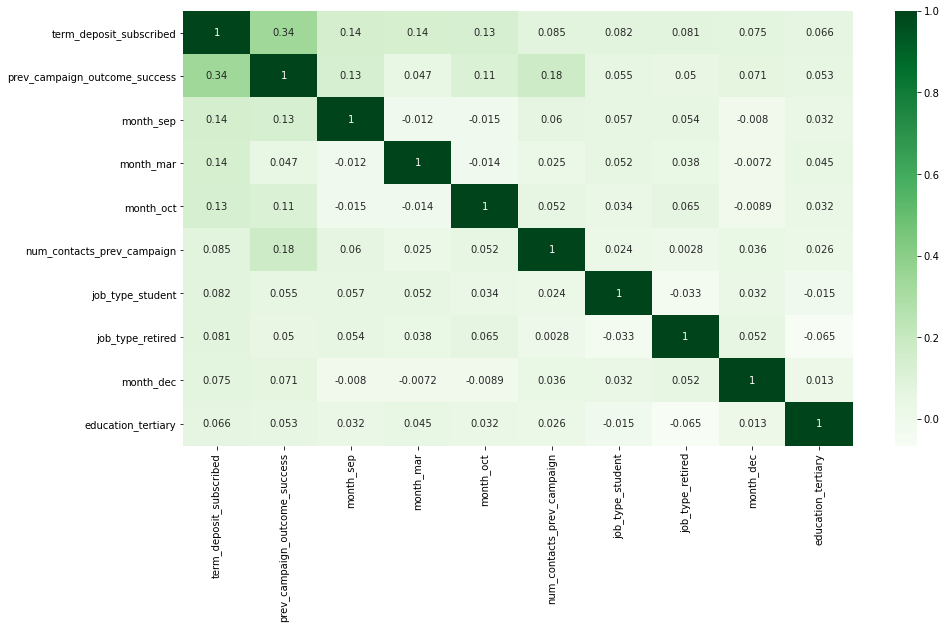

In [83]:
plt.figure(figsize=(15,8))
sns.heatmap(df_past[cols].corr(),annot=True,cmap="Greens")

##### Thus previous campaign success has an impact on the target variable

### Feature Scaling

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [85]:
df_train,df_validation=train_test_split(df_past,train_size=0.8,test_size=0.2,random_state=42)

In [86]:
df_test=df_prediction

In [87]:
scaler=StandardScaler()

In [88]:
X_train=df_train.drop(["customer_id","term_deposit_subscribed"],1)
y_train=df_train["term_deposit_subscribed"]
X_val=df_validation.drop(["customer_id","term_deposit_subscribed"],1)
y_val=df_validation["term_deposit_subscribed"]

<ipython-input-88-cf3dbb3b07b5>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train=df_train.drop(["customer_id","term_deposit_subscribed"],1)
<ipython-input-88-cf3dbb3b07b5>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_val=df_validation.drop(["customer_id","term_deposit_subscribed"],1)


In [89]:
X_train.select_dtypes(include=["int64","float64"])

,customer_age,default,balance,housing_loan,personal_loan,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
21749,42.0,0,256.0,0,0,26,788,6.0,0
17051,35.0,0,209.0,1,0,12,894,2.0,0
10260,28.0,0,22.0,0,0,25,789,3.0,0
2237,33.0,0,321.0,1,0,29,997,2.0,2
21106,35.0,0,215.0,1,0,2,993,4.0,13
...,...,...,...,...,...,...,...,...,...
21575,36.0,0,50.0,0,0,7,807,2.0,0
5390,31.0,0,943.0,0,0,29,724,2.0,0
860,41.0,0,354.0,1,0,29,997,1.0,0
15795,58.0,0,7720.0,0,0,21,701,3.0,0


In [90]:
X_train.select_dtypes(include=["int64","float64"]).columns

Index(['customer_age', 'default', 'balance', 'housing_loan', 'personal_loan',
       'day_of_month', 'last_contact_duration', 'num_contacts_in_campaign',
       'num_contacts_prev_campaign'],
      dtype='object')

In [91]:
scaling_list=['customer_age','balance',
       'day_of_month', 'last_contact_duration', 'num_contacts_in_campaign',
       'num_contacts_prev_campaign']

In [92]:
X_train[scaling_list]=scaler.fit_transform(X_train[scaling_list])

In [93]:
X_val[scaling_list]=scaler.transform(X_val[scaling_list])

In [94]:
df_test[scaling_list]=scaler.transform(df_test[scaling_list])

In [95]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [96]:
smote=SMOTE()

In [97]:
X_smote,y_smote=smote.fit_resample(X_train,y_train)
y_smote.value_counts()

0    17082
1    17082
Name: term_deposit_subscribed, dtype: int64

### Feature Selection

In [98]:
df_train[scaling_list]=scaler.fit_transform(df_train[scaling_list])

In [99]:
df_train

,customer_id,customer_age,default,balance,housing_loan,personal_loan,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
21749,id_36750,0.159017,0,-0.363862,0,0,1.229695,-0.894591,1.017293,-0.210771,...,0,0,0,0,0,0,0,0,0,1
17051,id_21293,-0.494508,0,-0.379368,1,0,-0.454818,0.528687,-0.245848,-0.210771,...,0,0,0,1,0,0,0,0,0,1
10260,id_31444,-1.148032,0,-0.441059,0,0,1.109373,-0.881164,0.069938,-0.210771,...,0,0,0,0,0,0,0,0,0,1
2237,id_5639,-0.681229,0,-0.342419,1,0,1.590662,1.911685,-0.245848,0.512717,...,0,0,0,0,0,0,0,0,0,0
21106,id_24742,-0.494508,0,-0.377388,1,0,-1.658041,1.857976,0.385723,4.491901,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,id_39416,-0.401147,0,-0.431822,0,0,-1.056429,-0.639475,-0.245848,-0.210771,...,0,0,0,0,0,0,0,0,0,1
5390,id_42237,-0.867950,0,-0.137220,0,0,1.590662,-1.753929,-0.245848,-0.210771,...,0,0,0,0,0,1,0,0,0,1
860,id_23649,0.065656,0,-0.331532,1,0,1.590662,1.911685,-0.561633,-0.210771,...,0,0,0,0,0,0,0,0,0,1
15795,id_10081,1.652788,0,2.098521,0,0,0.628083,-2.062754,0.069938,-0.210771,...,0,0,0,0,1,0,0,0,0,1


In [100]:
df_train_=df_train.drop("customer_id",1)
df_train_=df_train_.drop("term_deposit_subscribed",1)

<ipython-input-100-4115876b1ceb>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_train_=df_train.drop("customer_id",1)
<ipython-input-100-4115876b1ceb>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_train_=df_train_.drop("term_deposit_subscribed",1)


In [101]:
from sklearn.decomposition import PCA

In [102]:
pca_columns = []
for i in range(df_train_.shape[1]):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA()
pca_model.fit(df_train_)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_), columns = pca_columns)
explained_info_train = pd.DataFrame(pca_model.explained_variance_ratio_, columns=['Explained Info']).sort_values(by = 'Explained Info', ascending = False)
imp = []
for i in range(explained_info_train.shape[0]):
    imp.append(explained_info_train.head(i).sum())
explained_info_train_sum = pd.DataFrame()
explained_info_train_sum['Variable'] = pca_columns
explained_info_train_sum['Importance'] = imp
explained_info_train_sum

,Variable,Importance
0,PC1,Explained Info 0.0 dtype: float64
1,PC2,Explained Info 0.152832 dtype: float64
2,PC3,Explained Info 0.279991 dtype: float64
3,PC4,Explained Info 0.390607 dtype: float64
4,PC5,Explained Info 0.494567 dtype: float64
5,PC6,Explained Info 0.591307 dtype: float64
6,PC7,Explained Info 0.675727 dtype: float64
7,PC8,Explained Info 0.727353 dtype: float64
8,PC9,Explained Info 0.765174 dtype: float64
9,PC10,Explained Info 0.79746 dtype: float64


In [103]:
pca_columns = []
for i in range(15):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA(n_components = 15)
pca_model.fit(df_train_)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_), columns = pca_columns)

In [104]:
df_test_=df_test.drop("customer_id",1)

<ipython-input-104-e51f16251bcc>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_test_=df_test.drop("customer_id",1)


In [105]:
pca_model = PCA(n_components = 15)
pca_model.fit(df_test_)
df_pca_test = pd.DataFrame(pca_model.transform(df_test_), columns = pca_columns)

In [106]:
X = df_pca_train
y = df_train['term_deposit_subscribed']

In [107]:
df_validation[scaling_list]=scaler.transform(df_validation[scaling_list])

In [108]:
df_validation_=df_validation.drop(["customer_id","term_deposit_subscribed"],1)

<ipython-input-108-82ab1cf4227a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_validation_=df_validation.drop(["customer_id","term_deposit_subscribed"],1)


In [109]:
pca_model = PCA(n_components = 15)
pca_model.fit(df_validation_)
df_pca_val = pd.DataFrame(pca_model.transform(df_validation_), columns = pca_columns)

In [110]:
df_pca_val

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.939106,-0.342270,-0.218474,-0.163746,-0.131276,-0.263423,0.789256,-0.492468,-0.319696,-0.355101,0.256070,-0.594385,-0.106589,0.044049,0.104155
1,0.766456,1.414622,-0.796971,-0.947423,0.331443,-0.195618,-0.373996,0.252071,-0.208023,0.226779,0.005051,-0.616184,-0.025151,0.095136,-0.035830
2,1.983598,0.517938,0.375450,-1.265437,0.028029,-0.205115,0.281563,0.955961,0.938053,-0.079500,0.231275,-0.118240,-0.321261,-0.250602,-0.233955
3,-0.196589,1.210623,0.268948,-0.100064,0.169992,-0.441680,0.648876,0.096456,-0.477706,-0.745432,-0.104595,0.441791,-0.037712,-0.260693,-0.181771
4,1.429844,-0.040351,1.010837,-1.330006,0.459552,1.148547,0.720886,0.490085,0.136949,0.075152,0.205175,0.330062,-0.294656,0.439285,-0.045609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4771,-0.517953,-0.657295,-0.472548,-0.445356,-0.443653,-0.113128,0.620712,-0.149056,-0.300917,-0.322536,-0.923375,0.073560,0.403147,0.630787,0.179794
4772,1.075351,-0.084598,2.173072,0.171454,1.279302,0.239485,0.831054,0.800950,0.255347,-0.027101,0.290811,-0.243084,-0.396643,-0.249762,-0.467037
4773,-0.814035,-0.157148,-0.209591,0.287871,0.038757,-0.301497,0.865172,-0.478530,-0.298850,-0.389506,0.252613,-0.594533,-0.109307,0.059220,0.095053
4774,1.669394,-0.979606,-0.413151,-0.170162,0.191685,-0.056531,0.270025,0.386987,-0.702763,0.430778,-0.144670,-0.469374,-0.403466,0.007254,0.165705


In [111]:
X_test=df_pca_test
X_val=df_pca_val

In [112]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
y_smote.value_counts()

0    17082
1    17082
Name: term_deposit_subscribed, dtype: int64

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [114]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), SVC(), XGBClassifier()]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'SVC', 'XGBClassifier']
accuracy_train = []
accuracy_val = []
sensitivity_val=[]
sensitivity_train=[]
for model in models:
    mod = model
    mod.fit(X_smote, y_smote)
    y_pred_train = mod.predict(X_smote)
    y_pred_val = mod.predict(X_val)
    accuracy_train.append(accuracy_score(y_smote, y_pred_train))
    accuracy_val.append(accuracy_score(y_val, y_pred_val))
    

    data = {'Modelling Algorithm' : model_names, 'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val}
data = pd.DataFrame(data)
data['Difference'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data.sort_values(by = 'Validation Accuracy', ascending = False)

C:\Users\Bhavya batra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:37:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Bhavya batra\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,Modelling Algorithm,Train Accuracy,Validation Accuracy,Difference
2,RandomForestClassifier,0.999971,0.817420,18.255564
6,SVC,0.793847,0.661642,16.653805
5,KNeighborsClassifier,0.918247,0.652848,28.902858
7,XGBClassifier,0.930717,0.641332,31.092698
1,DecisionTreeClassifier,0.999971,0.635678,36.430300
0,LogisticRegression,0.690083,0.622069,9.855980
4,GradientBoostingClassifier,0.766450,0.603853,21.214359
3,AdaBoostClassifier,0.725588,0.580193,20.038319


In [115]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [116]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [117]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rf,
                        param_grid=params,
                        cv=4,
                        n_jobs=-1,
                        verbose=1,scoring='accuracy')

In [118]:
grid_search.fit(X_smote,y_smote)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [119]:
grid_search.best_score_

0.8880400421496312

In [120]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [121]:
rf_best=grid_search.best_estimator_

C:\Users\Bhavya batra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


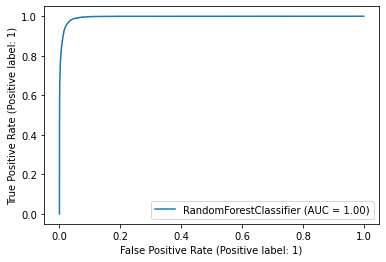

In [122]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_best,X_smote,y_smote)

In [123]:
rf_best.predict(X_val)

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [124]:
y_val

8174     0
22090    0
1743     0
5102     0
1818     0
        ..
5357     0
23121    1
7439     0
17597    0
19514    0
Name: term_deposit_subscribed, Length: 4776, dtype: int64